# COMPARTMENTALLY MODELLING EPIDEMIC SPREAD

Compartmental models are used to simply mathematical modelling of different types of disease spread. For example-
1. Susceptible-Infectious-Susceptible (SIS) model: Used to model diseases like influenze or common cold which does not render long term immunity. 
2. Susceptible-Infectious-Recovered (SIR) model: Used to model diseases with small infectious period like measeles
3. Carrier State SIR model: Used to model diseases like Tuberculosis in which infectious people still act  as carriers after long periods of time

We will be using one such Bio-Mathematical model called Susceptible-Exposed-Infectious-Recovered (SEIR)

In [1]:
from numpy import *
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

## SEIR Compartmental Strategy

For a sample with $N$ people, there are 4 broad categories, Susceptible $S$, Exposed $E$, Infected $I$ and Recovered $R$ such that: 

$$S + E+ I + R = N$$

$\Delta$ is the birth rate in the sample and $\mu$ is the death rate in the sample.

### Rate of change of Susceptibles:

$$
\frac{dS}{dt} = \Delta - \mu S -\frac{-\beta S I}{N} 
$$

$\beta$ dictates the transfer of susceptible people to exposed bracket

### Rate of change of exposed:

$$
\frac{dE}{dt} = \frac{\beta S I}{N} - (\mu + \alpha)E
$$

$\alpha$ dictates the transfer of exposed to infected compartment

### Rate of change of Infectious:

$$
\frac{dI}{dt} = \alpha E - (\gamma + \mu) I
$$

$\gamma$ dictates the transfer of infected people to recovered bracket

### Rate of change of Recovered:

$$
\frac{dR}{dt} = +\gamma I - \mu R
$$

>### NOTE: On Vitality Dynamics
>For general purposes, we assume that the birth rate $\Delta$ remains equal to death rate $\mu$ and that without the epidemic the sample size would have >remained constant. Since $\Delta*(S) = \mu*(S + I + R)$ for a non-fatal disease, we will concern ourselves with the specific fatality rate of the disease. In >other words, the fraction of infected people who die instead of recovering $\omega$.

In [2]:
population = N = 100
beta = 0.9
gamma = 0.08
month = 31
Days = 2 * month
alpha = 0.1
omega = fatality = 0.02

In [3]:
def dS(S, I):
    return -beta * S * I / N - fatality * I

def dE(S, I, E):
    return (beta * S * I / N) - (alpha * E)
                                
def dI(E, I):
    return alpha * E - (gamma * I)

def dR(I):
    return gamma * I - fatality * I

def death(I):
    return fatality * I

Tf = Days
dt = 0.1
steps = int(Tf/dt)

T = zeros(steps+1, float)
S = zeros(steps+1, float)
E = zeros(steps+1, float)
I = zeros(steps+1, float)
R = zeros(steps+1, float)
D = zeros(steps+1, float)

T[0] = 0.0
S[0] = population
E[0] = 3.0
I[0] = 1.0
R[0] = 0.0
D[0] = 0.0

In [4]:
def SIR_plot(i, inf, exp, sus, rec):
    
    T[i+1] = dt * (i+1)
    S[i+1] = S[i] + dS(S[i], I[i]) * dt
    E[i+1] = E[i] + dE(S[i], I[i], E[i]) * dt
    I[i+1] = I[i] + dI(E[i], I[i]) * dt
    R[i+1] = R[i] + dR(I[i]) * dt
    D[i+1] = death(I[i+1])
    
    inf.set_data(T[:i], I[:i])
    sus.set_data(T[:i], S[:i])
    exp.set_data(T[:i], E[:i])
    rec.set_data(T[:i], R[:i])
    dead.set_data(T[:i], D[:i])
    
    return (inf,sus, exp, rec, dead)


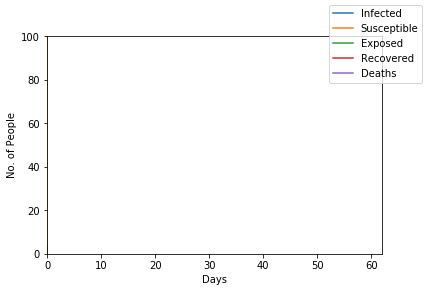

In [5]:
fig, ax = plt.subplots()
infected = ax.plot(T, I, label="Infected")[0]
susceptible = ax.plot(T, S, label="Susceptible")[0]
exposed = ax.plot(T, E, label="Exposed")[0]
recovered = ax.plot(T, R, label="Recovered")[0]
dead = ax.plot(T, D, label="Deaths")[0]

ax.set_xlabel("Days")
ax.set_ylabel("No. of People")
ax.set_xlim(0,Tf)
ax.set_ylim(0,N)

fig.legend()

In [6]:
#SIR_plot(Sample Size, beta, gamma, total duration)
ani = FuncAnimation(fig, SIR_plot, interval=1000/100, frames=steps, fargs=(infected, exposed, susceptible, recovered))

In [7]:
HTML(ani.to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available

In [61]:
ani.save('100People_2Months_NODISTANCING.mp4')